## Binary Classification of Breast Tumors using Neural Networks (Deep Learning) with TensorFlow and Keras
### Ali Al Bataineh, Ph.D.

##### Building a neural network model with TensorFlow/Keras for the Breast Cancer Wisconsin (Diagnostic) dataset. This dataset is commonly used in machine learning for binary classification tasks - it involves predicting whether a tumor is malignant or benign.

In [1]:
#First, let's import the necessary Python libraries:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#Now we will load the Breast Cancer dataset.

# Load the dataset
data = load_breast_cancer()

# Split the dataset into features (X) and target (y)
X = data.data
y = data.target

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data to have mean = 0 and variance = 1 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
#We'll use a simple feedforward neural network with two dense layers.
#The final layer uses a sigmoid activation function to output a probability that the tumor is malignant.

# Create a sequential model
model = Sequential()

# Add a fully connected layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Add another fully connected layer with 16 units and ReLU activation
model.add(Dense(16, activation='relu'))

# Add a final fully connected layer with a single unit and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

In [4]:
# this command always tell you the nenumber of features in your datasets.
X_train.shape[1]

30

In [5]:
#This code always tell you the number of your training instances/rows
X_train.shape[0]

455

In [6]:
X.shape
M: 1521
T: 1537

(569, 30)

In [7]:
#Next, we'll compile our model by specifying the optimizer, loss function, and metrics we want to track.
#Since this is a binary classification task, we'll use binary cross entropy as our loss function.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

Epoch 1/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 0.0545 - val_accuracy: 0.9825
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0158 - accuracy: 0.9956 - val_loss: 0.0540 - val_accuracy: 0.9825
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0539 - val_accuracy: 0.9825
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0538 - val_accuracy: 0.9825
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0538 - val_accuracy: 0.9825
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0538 - val_accuracy: 0.9825
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0540 - val_accuracy: 0.9825
Epoch 8/50
8/8 [==================

### Implementing Early Stopping

Early stopping can be implemented in Keras using callbacks. A callback is a set of functions to be applied at given stages of the training process.  

The EarlyStopping callback monitors the validation loss (val_loss). If the validation loss does not improve for 10 epochs (patience=10), the training process will be stopped. You can adjust these parameters based on your specific needs.

Remember that using these techniques does not always guarantee better performance, but they are commonly used practices to prevent overfitting.

After fitting the model, it returns a History object. This object holds a record of the loss values and metric values during training. We can use this data to generate plots of accuracy and loss over time. Here's how:

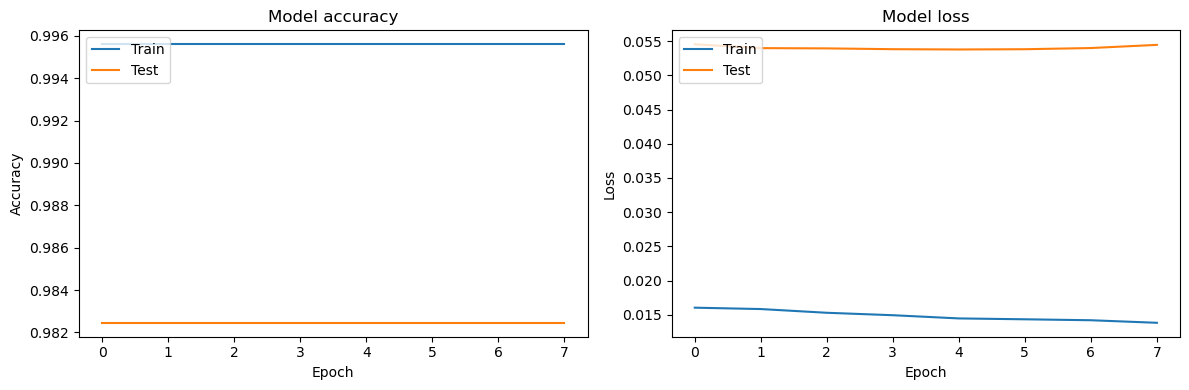

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [19]:
#We'll evaluate the model's performance on our test data:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9825
Test Accuracy: 0.9824561476707458


That's it! You've built a neural network with Keras and TensorFlow for binary classification on the Breast Cancer dataset. Remember, this is a simple model. There are many ways to expand from here, such as adding more layers, changing layer parameters, or experimenting with different types of layers.

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input shape
inputs = Input(shape=(X_train.shape[1],))

# Define the layers and connect them
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)



# Create a sequential model
model = Sequential()

# Add a fully connected layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Add another fully connected layer with 16 units and ReLU activation
model.add(Dense(16, activation='relu'))

# Add a final fully connected layer with a single unit and sigmoid activation
model.add(Dense(1, activation='sigmoid'))


In the functional API, you explicitly define the inputs and outputs for each layer. This gives more flexibility and allows for more complex models, such as models with multiple inputs or outputs, or models with shared layers.

The first layer in the model is the Input layer, which defines the shape of the input data (in this case, the number of features in your training data). Then, each subsequent layer is a function call that takes the previous layer as input. Finally, the Model class is used to define the model, taking the inputs and outputs as arguments.

Apart from the way it's written, this model is functionally equivalent to the one defined using the Sequential API. It has the same architecture and will produce the same results when trained and evaluated.

# Adding Dropout Layer
A dropout layer can be added right after the dense (fully connected) layers in the model.
dropout randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting.

In [ ]:
from tensorflow.keras.layers import Dropout

# Define the input shape
inputs = Input(shape=(X_train.shape[1],))

# Define the layers and connect them
x = Dense(32, activation='relu')(inputs)
x = Dropout(0.5)(x)  # Add dropout layer after first dense layer
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer after second dense layer
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)
